# Esame Laboratorio di Programmazione II - 22/07/2025


Scrivete chiaramente sul notebook il vostro nome e matricola e rinominate il file che consegnate come `matricola.ipynb` (la matricola è SMnumeri o ECnumeri).

Per ogni funzione e metodo che richiede un campionamento rispetto ad una distribuzione settate il seed a 0: ``np.random.seed(0)``.

Stampate il risultato delle domande e consegnate il compito eseguito, quindi per cui ogni cella ha il corrispondente output.
Quindi ad esempio

e.g., 
NON scrivete: 
```python 
    lista=np.array([1,2,3])
```
ma 
```python
    lista=np.array([1,2,3]) 
    print('lista =', lista)   
```
Attenzione!Se scrivete:
```python
    lista=np.array([1,2,3])
    lista
```
``lista`` sarà l'unico ouput che si vede di quella cella

NB: Potete usare anche più di una cella python per domanda e se l'output è una matrice molto grande non dovete stamparla.

Sarà valutata anche la presentazione, ad esempio un plot senza etichette sugli assi o illeggibili sarà valutato meno bene di uno con etichette chiare.

Cercate di commmentare il compito di modo che si capisca cosa avete fatto.

Controllate attentamente di avere consegnato il file giusto.

## Esercizio 1

Crea un vettore NumPy con le seguenti spese annuali per l’auto (in euro) sostenute da 7 persone:
3200, 2750, 4100, 3600, 2950, 5100, 4400

1. Calcola la spesa totale complessiva sostenuta dal gruppo.

2. Le persone con spese minori di 3000 € ottengono una detrazione fiscale del 15%. Applica la modifica al vettore.

3. Quanto ha risparmiato il gruppo dopo la detrazione fiscale?


In [5]:
import numpy as np

# Lista delle spese annuali fornita
lista_spese = [3200, 2750, 4100, 3600, 2950, 5100, 4400]

# Creo il vettore Numpy
spese = np.array(lista_spese).astype(float)

# --- 1. CALCOLO SPESA TOTALE ---

# Utilizzo il metodo .sum() per sommare tutti gli elementi del vettore
spesa_totale_iniziale = spese.sum()

# Stampo
print(f"1. Spesa totale iniziale del gruppo: {spesa_totale_iniziale:.2f} €")

# --- 2. APPLICO DETRAZIONE FISCALE ---

# Creo una copia dell'array originale con .copy()
spese_detratte = spese.copy()

# Uso l'indicizzazione booleana
spese_detratte[spese < 3000] *= 0.85

# Stampo
print(f"2. Vettore spese dopo la detrazione: {np.round(spese_detratte, 2). tolist()}")

# --- 3. CALCOLO RISPARMIO ---

# Calcolo la nuova somma totale con le spese scontate
spesa_totale_finale = spese_detratte.sum()
risparmio = spesa_totale_iniziale - spesa_totale_finale

# Stampo
print(f"3. Risparmio totale del gruppo: {risparmio:.2f} €")


1. Spesa totale iniziale del gruppo: 26100.00 €
2. Vettore spese dopo la detrazione: [3200.0, 2337.5, 4100.0, 3600.0, 2507.5, 5100.0, 4400.0]
3. Risparmio totale del gruppo: 855.00 €


## Esercizio 2
1. Scrivi una funzione che simula il lancio di un dado per N volte e restituisce un array con il numero di volte che è uscita ciascuna faccia (da 1 a 6).
2. Calcolare la frequenza % con la dimensione del campione (numero di lanci) 100 volte da 10 a 5000.  Ottieni così 100 array di frequenze.
3. Fai il plot dell’andamento della frequenza media delle facce 1, 3 e 6 in funzione della dimensione del campione.



Test funzione (10 lanci): [1 2 3 3 1 0]


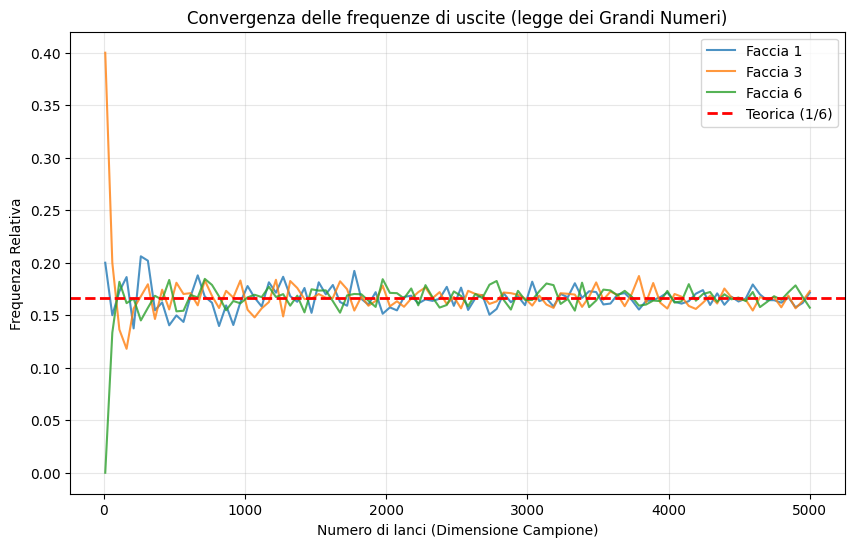

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. DEFINISCO LA FUNZIONE ---
def simula_lanci_dado(n_lanci):
    # Genero n numeri casuali tra 1 e 6
    lanci = np.random.randint(1, 7, size=n_lanci)

    # Conto le occorrenze
    conteggi = np.bincount(lanci, minlength=7)

    # Risultato
    return conteggi[1:]

# Test rapido
print(f"Test funzione (10 lanci): {simula_lanci_dado(10)}")

# --- 2. CALCOLO FREQUENZE PER CAMPIONI CRESCENTI ---

# Creo array
dimensioni_campione = np.linspace(10, 5000, 100).astype(int)

# Lista per salvare i risultati
storico_frequenze = []

for n in dimensioni_campione:
    # Eseguo la simulazione
    conteggi = simula_lanci_dado(n)

    # Calcolo le frequenze relative
    freq_relative = conteggi / n

    # Aggiungo alla lista
    storico_frequenze.append(freq_relative)

# Converto la lista di liste in matrice per facilitare il plotting
matrice_frequenze = np.array(storico_frequenze)

# --- 3. GRAFICO ---
plt.figure(figsize=(10, 6))

# Estraggo le colonne della matrice
plt.plot(dimensioni_campione, matrice_frequenze[:, 0], label ='Faccia 1', alpha=0.8)
plt.plot(dimensioni_campione, matrice_frequenze[:, 2], label ='Faccia 3', alpha=0.8)
plt.plot(dimensioni_campione, matrice_frequenze[:, 5], label ='Faccia 6', alpha=0.8)

# Aggiungo la linea teorica per mostrare la convergenza
plt.axhline(y=1/6, color='red', linestyle='--', label='Teorica (1/6)', linewidth=2)

# Metto le etichette
plt.title('Convergenza delle frequenze di uscite (legge dei Grandi Numeri)')
plt.xlabel('Numero di lanci (Dimensione Campione)')
plt.ylabel('Frequenza Relativa')
plt.legend()
plt.grid(True, alpha=0.3)

# Mostro il grafico
plt.show()



## Esercizio 3

1. Genera una matrice NumPy di dimensioni 7 x 7, con valori estratti da una distribuzione normale con media = 0, ed std = 5.

2. Per ogni riga, identifica il valore più lontano da zero (cioè con valore assoluto massimo). Crea un array con questi 7 valori (uno per riga).

3. Calcola quante di queste righe hanno il valore più lontano da zero positivo?

In [23]:
import numpy as np

# Imposto il seed
np.random.seed(0)

# --- 1. GENERAZIONE MATRICE 7X7 ---

# Distribuzione Normale
matrice = np.random.normal(loc = 0, scale=5, size=(7, 7))

# Stampo
print("Matrice generata (prime 2 righe):")
print(np.round(matrice[:2], 2))         # Stampo solo un pezzettino

# --- 2. IDENTIFICARE IL VALORE più lontano da zero ---

# Strategia:
#  A. Calcolo il valore assoluto di tutta la matrice
#  B. Trovo l'indice del massimo valore assolto per ogni riga
indici_max_assoluto = np.argmax(np.abs(matrice), axis= 1)

#  C. Uso "Advanced Indexing" per estrarre i valori originali
righe = np.arange(7)
valori_lontani = matrice[righe, indici_max_assoluto]

# Stampo con arrotondamento e conversione a lista per pulizia
print(f"\n2. Valori più lontani da zero (uno per riga): {np.round(valori_lontani, 2).tolist()}")

# --- 3. CONTO QUANTE RIGHE HANNO IL VALORE POSITIVO ---

# Prendo l'array e conto quanti sono > 0
num_positivi = np.sum(valori_lontani > 0)

# Stampo
print(f"\n3. Numero di valori 'lontani' che sono positivi: {num_positivi}")




Matrice generata (prime 2 righe):
[[ 8.82  2.    4.89 11.2   9.34 -4.89  4.75]
 [-0.76 -0.52  2.05  0.72  7.27  3.81  0.61]]

2. Valori più lontani da zero (uno per riga): [11.2, 7.27, -12.76, 11.35, -9.9, -7.1, 9.75]

3. Numero di valori 'lontani' che sono positivi: 4


## Esercizio 4 

Utilizza il dataset cereal.csv.

Contiene dati nutrizionali (proteine, fibre, calorie, zuccheri, ecc.) per circa 70 cereali.


1.  Aggiungi una colonna chiamata `nutri_score`, definita come:
$$
\texttt{nutri\_score} = \frac{\texttt{protein} + \texttt{fiber}}{\texttt{calories}}
$$

Indica quanti nutrienti positivi ci sono per ogni caloria: più è alto, più il cereale è "nutriente a parità di energia.

2. Trova i **5 cereali con il `nutri_score` più alto** e stampali con `name` e `nutri_score`.

3. Filtra i cereali che soddisfano entrambi i criteri:

   - meno di 120 calorie  
   - più di 2 grammi di fibra 


4. **Crea un grafico a barre** dei **10 cereali con il `nutri_score` più alto**, usando `name` sull’asse x.

5. Crea uno **scatter plot** (grafico a punti) che visualizzi:

   - `calories` sull’asse x  
   - `nutri_score` sull’asse y
   - `protein` nel colore dei punti


1.Prime righe con nutri_score calcolato:
                        name  calories  nutri_score
0                  100% Bran        70     0.200000
1          100% Natural Bran       120     0.041667
2                   All-Bran        70     0.185714
3  All-Bran with Extra Fiber        50     0.360000
4             Almond Delight       110     0.027273

2. Top 5 cereali per nutri_score:
                         name  nutri_score
3   All-Bran with Extra Fiber     0.360000
0                   100% Bran     0.200000
2                    All-Bran     0.185714
9                 Bran Flakes     0.088889
64     Shredded Wheat 'n'Bran     0.077778

3. Numero di cereali 'light & healthy' trovati: 19
                        name  calories  fiber
0                  100% Bran        70   10.0
2                   All-Bran        70    9.0
3  All-Bran with Extra Fiber        50   14.0
8                  Bran Chex        90    4.0
9                Bran Flakes        90    5.0


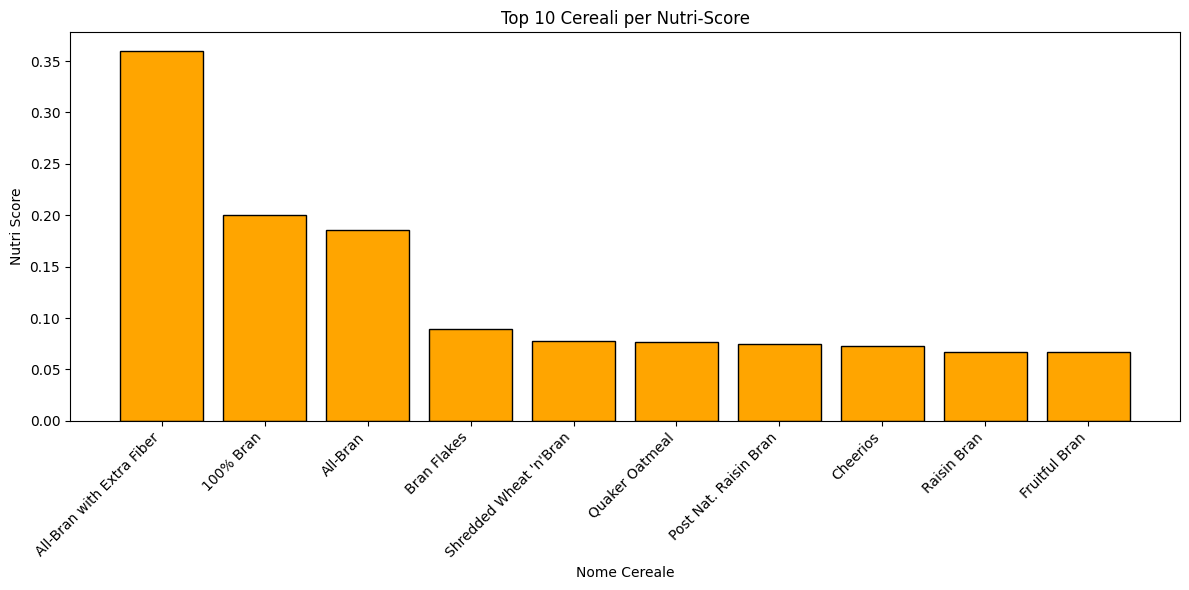

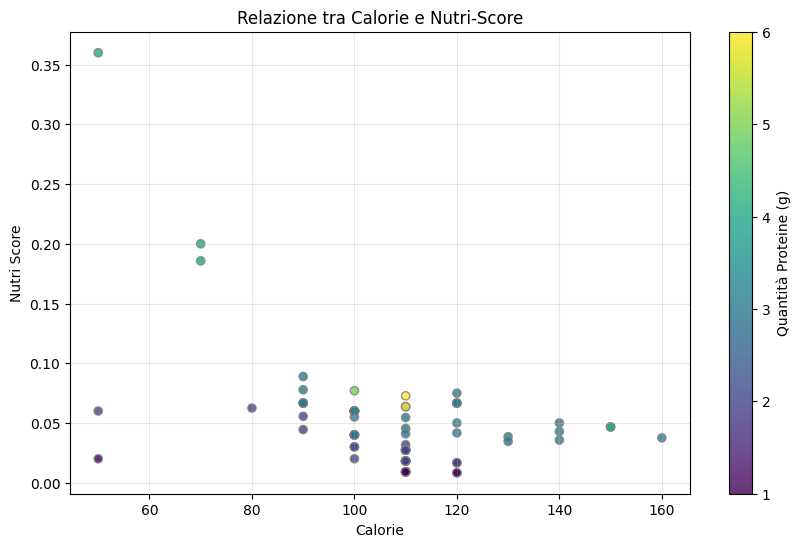

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Carico il dataset
df = pd.read_csv('cereal.csv', sep=';')

# --- 1. CREAZIONE NUOVA COLONNA --- (uso la formula: (protein + fiber) / calories)
df['nutri_score'] = (df['protein'] + df['fiber']) / df ['calories']

# Stampo le prime righe per controllo
print("1.Prime righe con nutri_score calcolato:")
print(df[['name', 'calories', 'nutri_score']].head())


# --- 2. TROVO I 5 CEREALI con il nutri_score più altro ---

# Ordino in modo decrescente e prendo i primi 5
top_5_nutri = df.sort_values(by='nutri_score', ascending=False).head(5)

# Stampo
print("\n2. Top 5 cereali per nutri_score:")
print(top_5_nutri[['name', 'nutri_score']])


# --- 3. FILTRO I CEREALI: Calorie < 120 AND Fibra > 2 ---
cereali_light_healthy = df[ (df['calories'] < 120) & (df['fiber'] > 2) ]

# Stampo
print(f"\n3. Numero di cereali 'light & healthy' trovati: {len(cereali_light_healthy)}")
print(cereali_light_healthy[['name', 'calories', 'fiber']].head())


# --- 4. GRAFICO A BARRE dei 10 cereali con nutri_score più alto ---

# Preparo i dati: riordino e prendo i primi 10
top_10 = df.sort_values(by='nutri_score', ascending=False).head(10)

# Allargo la figura per far stare i nomi
plt.figure(figsize=(12, 6))

# Bar plot: Nomi sull'asse X, Punteggio sull'asse Y
plt.bar(top_10['name'], top_10['nutri_score'], color='orange', edgecolor='black')
plt.title('Top 10 Cereali per Nutri-Score')
plt.xlabel('Nome Cereale')
plt.ylabel('Nutri Score')
plt.xticks(rotation=45, ha='right') # Ruoto i nomi a 45° per leggerli meglio
plt.tight_layout() # Aggiusta i margini per non tagliare il testo
plt.show()

# --- 5. SCATTER PLOT: Calories vs Nutri_score (colore = protein)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['calories'], df['nutri_score'], 
                      c=df['protein'], cmap='viridis', alpha=0.8, edgecolors='gray')

plt.colorbar(scatter, label='Quantità Proteine (g)') # Aggiungo la legenda laterale per i colori
plt.title('Relazione tra Calorie e Nutri-Score')
plt.xlabel('Calorie')
plt.ylabel('Nutri Score')
plt.grid(True, alpha=0.3)

plt.show()


## Esercizio 5 

Utilizza il dataset `imdb_top_1000.csv`, che contiene informazioni su 1000 film recensiti su IMDB.

1. Quanti **valori mancanti** ci sono per colonna? Elimina le righe con i valori mancanti.

2. Elimina la colonna `Overview`. Aggiungi una colonna (`main_genre`) con solo il primo genere della colonna `genre`. Quali sono i 5 generi più frequenti?

3. Che attore/attrice è stato/a più volte la `Star1` e quello/a che ha fatto più film.

4. Calcola l'IMDB_rating medio e il Gross medio di ogni genere. Fai uno scatter plot dell'IMDB_rating medio e il Gross medio di ogni genere. Riesci a mettere anche l'ettichetta del genere?

5. Visualizza la distribuzione del IMDB_rating  e la distribuzione del `Gross` dei primi 5 main_genre. (Hint fai due violin plot).




1. Valori mancanti per la colonna (prima del drop):
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64
Righe rimaste dopo la pulizia: 714

2. I 5 generi più frequenti sono:
main_genre
Drama        192
Action       127
Comedy       104
Crime         74
Biography     73
Name: count, dtype: int64

3. Attore più volte 'Star1': Tom Hanks
   Attore con più film in totale: Robert De Niro


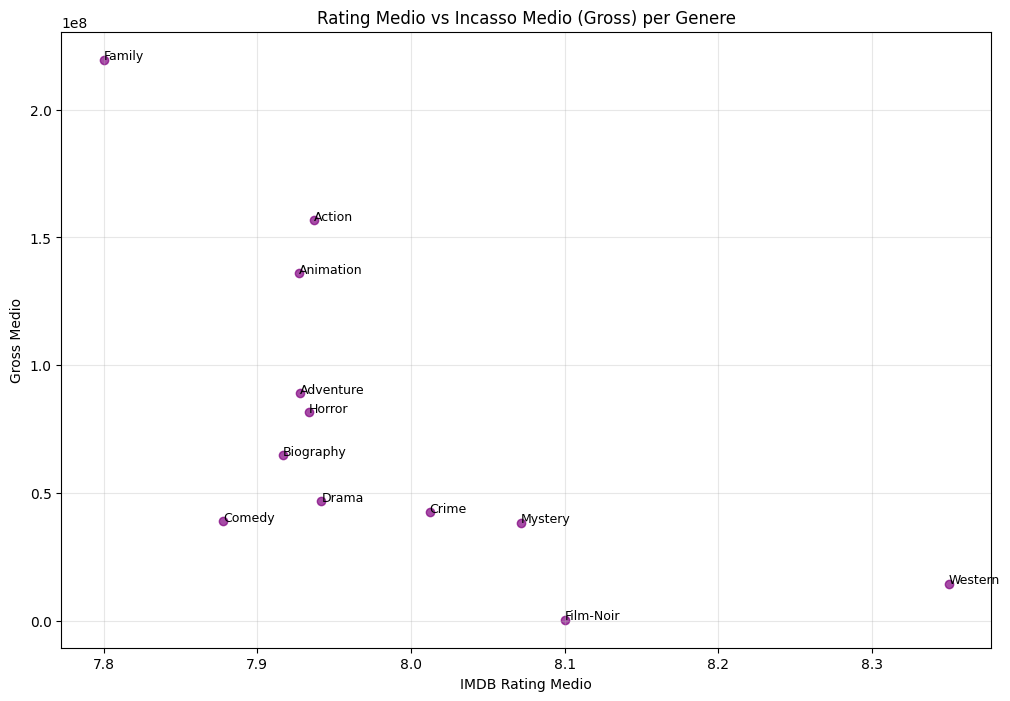

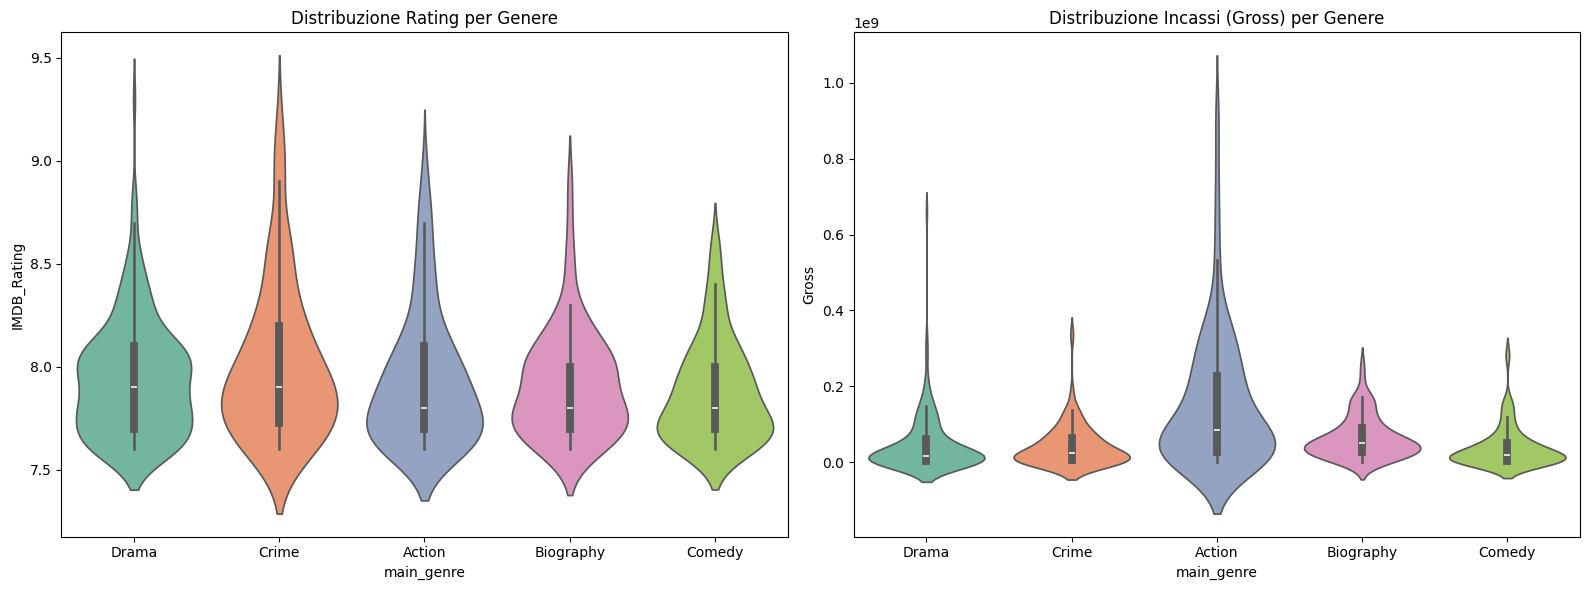

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. VALORI MANCANTI ---

# Aggiungo il database
df = pd.read_csv('imdb_top_1000.csv', thousands=',')    # thousands=',' aiuta pandas a capire che la virgola è un separatore di migliaia

# Controllo valori mancanti
print("1. Valori mancanti per la colonna (prima del drop):")
print(df.isnull().sum())

# Elimino le righe con valori mancanti
df.dropna(inplace=True)
print(f"Righe rimaste dopo la pulizia: {len(df)}")


# --- 2. GESTIONE GENERI E OVERVIEW ---

# Elimino la colonna 'Overview'
df.drop(columns=['Overview'], inplace=True)

# Creo la colonna 'main_genre' prendendo solo il primo genere
df['main_genre'] = df['Genre'].str.split(',').str[0]

# Trovo i 5 generi più frequenti
top_5_genres=df['main_genre'].value_counts().head(5)

# Stampo
print("\n2. I 5 generi più frequenti sono:")
print(top_5_genres)


# --- 3. ANALISI ATTORI ---

# A) Chi è stato più volte Star1?
top_star1 = df['Star1'].mode()[0]

# B) Chi ha fatto più film in assoluto?
tutti_attori = pd.concat([df['Star1'], df['Star2'], df['Star3'], df['Star4']])
attore_piu_presente = tutti_attori.mode()[0]

# Stampo
print(f"\n3. Attore più volte 'Star1': {top_star1}")
print(f"   Attore con più film in totale: {attore_piu_presente}")


# --- 4. SCATTER PLOT: Rating medio vs Gross Medio per genere ---

# Raggruppo per genere e calcolo le medie
genre_stats = df.groupby('main_genre') [['IMDB_Rating', 'Gross']].mean()

plt.figure(figsize=(12, 8))
plt.scatter(genre_stats['IMDB_Rating'], genre_stats['Gross'], color='purple', alpha=0.7)

# Aggiungo le etichette per ogni punto (genere)
for genere, riga in genre_stats.iterrows():
    plt.text(riga['IMDB_Rating'], riga['Gross'], genere, fontsize=9)

plt.title('Rating Medio vs Incasso Medio (Gross) per Genere')
plt.xlabel('IMDB Rating Medio')
plt.ylabel('Gross Medio')
plt.grid(True, alpha=0.3)
plt.show()


# --- 5. VIOLIN PLOT: Distribuzione rating e Gross per i Top 5 Generi ---

# Filtro il dataframe tenendo solo i film che appartengono ai top 5 generi
df_top5 = df[df['main_genre'].isin(top_5_genres.index)]

# Creo due sottografici uno accanto all'altro
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Violin Plot 1: IMDB Rating
sns.violinplot(data=df_top5, x='main_genre', y='IMDB_Rating', ax=axes[0], palette='Set2', hue='main_genre', legend=False)
axes[0].set_title('Distribuzione Rating per Genere')

# Violin Plot 2: Gross
sns.violinplot(data=df_top5, x='main_genre', y='Gross', ax=axes[1], palette='Set2', hue='main_genre', legend=False)
axes[1].set_title('Distribuzione Incassi (Gross) per Genere')

plt.tight_layout()
plt.show()




## Esercizio 6

Considera i seguenti dati, che :

`x = np.linspace(0, 10, 100)`  
`y = -3.5 * x + 2 + np.random.normal(0, 10, 100)`

Cerca di riprodurre la retta fittando i parametri della funzione y = ax + b.

1. Stima i parametri della retta.
2. Calcola l’intervallo di confidenza al 95% dei parametri a e b.
N.B il secondo output del metodo curve_fit è proprio la matrice di covarianza: `params, cov = curve_fit(retta, x, y)`. 
L'**errore standard** di ciascun parametro si calcola come:

$$
\text{errore\_standard}_i = \sqrt{\text{cov}(i, i)}
$$

dove $\text{cov}(i, i)$ è l'elemento diagonale $i$-esimo della **matrice di covarianza**.

L’**intervallo di confidenza al 95%** si approssima con:

$$
\text{parametro}_i \pm 1.96 \times \text{errore\_standard}_i
$$
3. Plotta i punti originali e la retta ottenuta con anche l'intervallo di confidenza

Parametri Stimati: a=-3.7973, b=4.0847

Intervalli di confidenza (95%):
a: [-4.4792, -3.1155]
b: [0.1381, 8.0313]


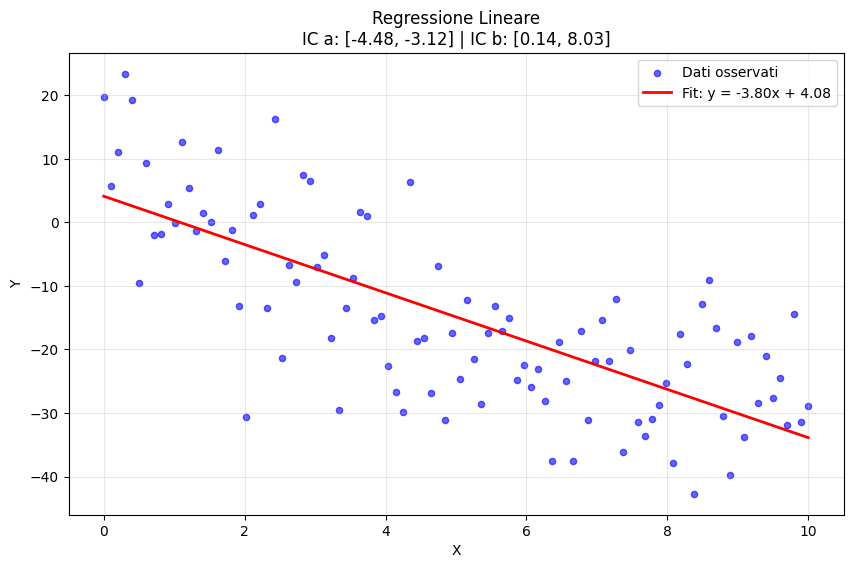

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --- 1 . STIMO I PARAMETRI DELLA RETTA ---

# A. Generazione dei dati
np.random.seed(0)

# Creo 80 punti tra 0 e 5
x = np.linspace(0, 10, 100)

# Genero la y usando la formula: y = -3.5*x + 2 + rumore
y = -3.5 * x + 2 + np.random.normal(0, 10, 100)

# B. Definisco il modello -> Qui cerco una retta: y = ax + b
def retta (x, a, b):
    return a * x + b

# C. Stima dei parametri con curve_fit
# curve_fit restituisce due cose:
# - popt: i parametri ottimizzati [a, b]
# - pcov: la matrice di covarianza (serve per gli errori)
popt, pcov = curve_fit(retta, x, y)

# Estraggo i coefficienti trovati 
a_stimato, b_stimato = popt

# Stampo
print(f"Parametri Stimati: a={a_stimato:.4f}, b={b_stimato:.4f}")

# --- 2 . CALCOLO INTERVALLO DI CONFIDENZA ---

# L'errore standard è la radice quadrata della diagonale della matrice di covarianza
errori_standard = np.sqrt(np.diag(pcov))
errore_a, errore_b = errori_standard

# Intervallo al 95%: parametro +/- 1.96 * errore

a_min = a_stimato - 1.96 * errore_a
a_max = a_stimato + 1.96 * errore_a

b_min = b_stimato - 1.96 * errore_b
b_max = b_stimato + 1.96 * errore_b

# Stampo
print("\nIntervalli di confidenza (95%):")
print(f"a: [{a_min:.4f}, {a_max:.4f}]")
print(f"b: [{b_min:.4f}, {b_max:.4f}]")


# --- 3. FACCIO IL GRAFICO ---
plt.figure(figsize=(10, 6))

# Punti originali
plt.scatter(x, y, label='Dati osservati', color='blue', alpha=0.6, s=20)

# Retta ottimale calcolata
y_fit = retta(x, a_stimato, b_stimato)
plt.plot(x, y_fit, color='red', linewidth=2, label=f'Fit: y = {a_stimato:.2f}x + {b_stimato:.2f}')

# Visualizzo l'incertezza
plt.title(f'Regressione Lineare\nIC a: [{a_min:.2f}, {a_max:.2f}] | IC b: [{b_min:.2f}, {b_max:.2f}]')

# Aggiungo dettagli
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, alpha=0.3)

# Mostro il grafico
plt.show()